### Task 3: Linear Regression
##### _-Submitted By Hetal Patel Dholu_

In [1]:
#importing necessary Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
#preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import Pipeline


In [2]:
#importing data
house_price = pd.read_csv("housing.csv")
display(house_price.shape,house_price.sample(1))

(545, 13)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
301,4200000,3520,3,1,2,yes,no,no,no,no,0,yes,semi-furnished


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#preprocessing the datausing pipelines
num_cols =  house_price.select_dtypes(include="number").columns.tolist()#
cat_cols = house_price.select_dtypes(include="object").columns.tolist()#

In [5]:
display(num_cols,cat_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [6]:
#Null value check
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#inspecting categorical columns
house_price[cat_cols].head(1)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished


In [8]:
#Encoding categorical columns
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(house_price[cat_cols])

In [9]:
house_encoded = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cat_cols),index=house_price.index)
house_price = pd.concat([house_price.drop(cat_cols, axis=1),house_encoded],axis=1)

#### Modelling Using Linear Regression

In [10]:
lr = LinearRegression()
X = house_price.drop('price',axis=1)
y=house_price['price']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(x_test)

In [12]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 1754318687330.6616
MAE: 970043.4039201637
R2: 0.6529242642153188


### Plot regression line and interpret coefficients.

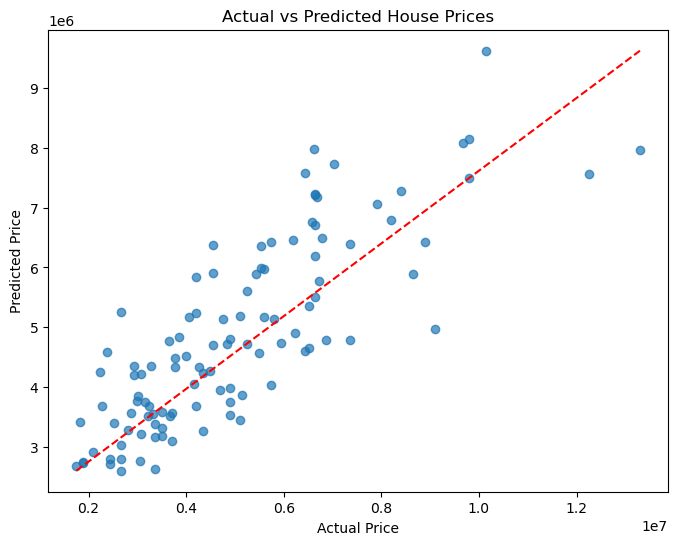

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [15]:
# Get feature names after one-hot encoding
feature_names = list(X.columns)

# Get coefficients from the trained model
coefficients = lr.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
14              airconditioning_yes  3.957134e+05
13               airconditioning_no -3.957134e+05
12              hotwaterheating_yes  3.423249e+05
11               hotwaterheating_no -3.423249e+05
16                     prefarea_yes  3.149453e+05
15                      prefarea_no -3.149453e+05
19     furnishingstatus_unfurnished -2.334694e+05
4                           parking  2.248419e+05
9                       basement_no -1.951256e+05
10                     basement_yes  1.951256e+05
5                       mainroad_no -1.839600e+05
6                      mainroad_yes  1.839600e+05
17       furnishingstatus_furnished  1.801756e+05
7                      guestroom_no -1.158050e+05
8                     guestroom_yes  1.158050e+05
1                          bedrooms  7.677870e+04
18  furnishingstatus_semi-furnished  5.329381e+04


### Linear Regression Concepts

#### 1. Assumptions of linear regression
- Relationship between features and target is linear
- Observations are independent
- Errors have constant variance
- Errors are normally distributed
- Features are not highly correlated
- Errors are not autocorrelated

#### 2. Interpreting coefficients
- Each coefficient shows how the target changes if the feature increases by one unit, keeping others constant
- Positive coefficient: target increases
- Negative coefficient: target decreases
- For categorical features, the coefficient shows effect compared to the baseline category

#### 3. R² score
- Measures how much of the target's variance is explained by the features
- Ranges from 0 to 1
- Example: R² = 0.7 means 70% of variance is explained

#### 4. MSE vs MAE
- MSE (Mean Squared Error) penalizes large errors more
- Use MSE when large deviations matter
- MAE (Mean Absolute Error) treats all errors equally and is robust to outliers

#### 5. Detecting multicollinearity
- Look at correlation between features
- Use Variance Inflation Factor (VIF); VIF > 5 or 10 indicates high correlation
- Large condition number can also indicate multicollinearity

#### 6. Simple vs multiple regression
| Feature | Simple Regression | Multiple Regression |
|---------|-----------------|------------------|
| Number of features | 1 | 2 or more |
| Equation | Y = β0 + β1X | Y = β0 + β1X1 + β2X2 + ... + βnXn |
| Use | Effect of one feature | Effect of multiple features |

#### 7. Linear regression for classification
- Not suitable directly; predicts continuous values
- Use logistic regression for classification
- Linear regression can give values outside 0-1

#### 8. Violating regression assumptions
- Linearity: biased predictions
- Constant variance: wrong standard errors
- Non-normal errors: unreliable tests
- Multicollinearity: unstable coefficients
- Autocorrelation: systematic prediction errors
